In [2]:
# @title Import packages
import numpy as np
import matplotlib.pyplot as plt
import importlib
# import all functions defined in ddm.py
import ddm

# set the font size of plots
font = {'size'   : 14}
plt.rc('font', **font)

In [99]:
# Reload all functions from the ddm.py file
# use after making changes in ddm.py.
importlib.reload(ddm)

<module 'ddm' from '/Users/pica/Documents/GitHub/indp22-ddm-simulation-project/code/ddm.py'>

- Basic setup to simulate trajectories with 3 parameters (drift, bound, starting point) using Euler Mayurama  method
	- Obtain histograms and psychometrics
	- Compare to analytic solutions, explore the error of the approximation with dt
	- Explore dependence of histograms and psychometrics with parameter values
- Add time varying bound, variability in parameters
- Explore race models

- "Optogenetic manipulations"
	- "Sensory neurons" vs "Integrator neurons"
	- Bound "deletion"
        - Other ways?

- History effects
	- Explore updates on starting point and drifts
	- Also post error slowing (increase bounds after errors)

### Perform simulations

In [100]:
# Define DDM parameters
mu = 0.5 # drift
theta = 1 # bound
z = 0 # starting point
sigma = 1 # noise std
b = 0.1 # time varying bound

# Define simulation parameters
n_trials = 1000
dt = .001
T = 10

t = np.arange(0, T, dt)
theta = theta*np.ones((t.size,1))

In [101]:
# Run DDM simulations for different drifts
n_mu = 21
mu_list = 2*np.linspace(-1, 1, n_mu)
z_list = 0*np.concatenate((-np.ones((10,)),\
                              np.zeros((1,)),\
                              np.ones((10,))))
b = 0.01
# Preallocate results
S_list = []
hits_list = []
errs_list = []
for i, mu in enumerate(mu_list):
    z = z_list[i]
    # Simulate trajectories
    S, _ = ddm.sim_ddm(mu, theta, z, sigma, n_trials, dt, T)
    S_list.append(S)
    hits, errs = ddm.calc_hits_errs(S, mu)
    hits_list.append(hits)
    errs_list.append(errs)

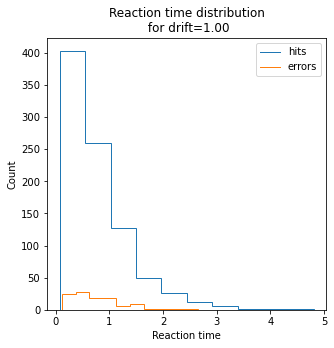

In [102]:
# Plot the reaction time distributions for the hit and error trials, for example mu
mu_i = 15 # example mu

hits = S_list[mu_i][hits_list[mu_i],1]
errs = S_list[mu_i][errs_list[mu_i],1]

ddm.plot_rt_hist(hits, errs)
plt.title('Reaction time distribution\n for drift={:.2f}'.format(mu_list[mu_i]))
plt.show()

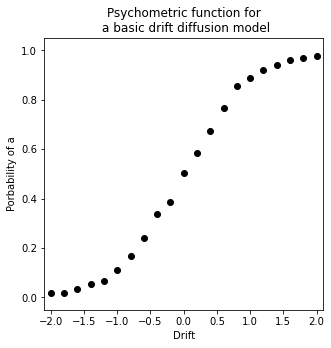

In [103]:
# Plot a psychometric curve
prob_a = ddm.calc_psychometric(S_list, mu_list)
ddm.plot_psychometric(prob_a, mu_list)
plt.title('Psychometric function for\n a basic drift diffusion model')
plt.show()

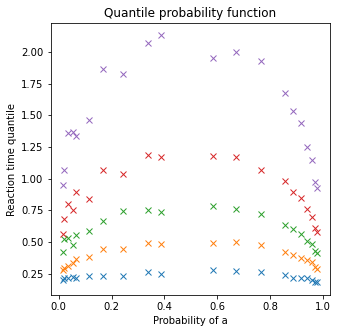

In [125]:
# Plot the quantile probability function
ddm.plot_quantile_prob_func(S_list, hits_list, errs_list, mu_list, prob_a)
plt.title('Quantile probability function')
plt.show()

### Race model

In [ ]:
# Define race parameters
mu = [1, 1] # drift
theta = [1, 1] # bound
z = [0, 0] # starting point
sigma = [1, 1] # noise std
b = [0, 0] # time varying bound

# Define simulation parameters
n_trials = 1000
dt = .001
T = 10

S, C, traj = ddm.sim_race(mu, theta, b, z, sigma, n_trials=1000, dt=.001, T=10)

In [ ]:
# plot the confidence and the reaction time
plt.figure(figsize=(10,5))
plt.plot(S[:,1], label='reaction time')
plt.plot(C, label='confidence')
plt.xlabel('Trial')
plt.legend(loc='upper right')
plt.xlim([250, 350])
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(S[:,1], C, marker='.')
plt.xlabel('Reaction time')
plt.ylabel('Confidence')
plt.show()

In [ ]:
rt_hist, rt_bin_edges = np.histogram(S[:,0])

plt.figure(figsize=(5,5))
plt.stairs(rt_hist, rt_bin_edges, label='S')
plt.xlabel('Reaction time')
plt.ylabel('Count')
plt.legend(loc='upper right');
plt.title('Reaction time distribution\n for drift={:.2f}'.format(mu_list[mu_i]))
plt.show()

### Optogenetic experiment

Manipulate sensory detection

In [108]:
# Optogentic manipulation of the sensory detector, here we change the drift parameter mu

# Define DDM parameters
mu = 2 # drift
theta = 1 # bound
z = 0 # starting point
sigma = 1 # noise std
b = 0 # time varying bound

# Define simulation parameters
n_trials = 1000
dt = .001
T = 10

# Define optogenetic parameters
t = np.arange(0, T, dt) # simulation time
theta = theta*np.ones((t.size,1))
opto_time = np.where(np.logical_and(t >= 0.2, t <= 0.7))[0] # 500 msec stimulation
opto_val = 1*mu
mu = mu*np.ones((t.size,1))
mu[opto_time] -= opto_val

# Run simulation
S, traj = ddm.sim_ddm(mu, theta, z, sigma, n_trials, dt, T)

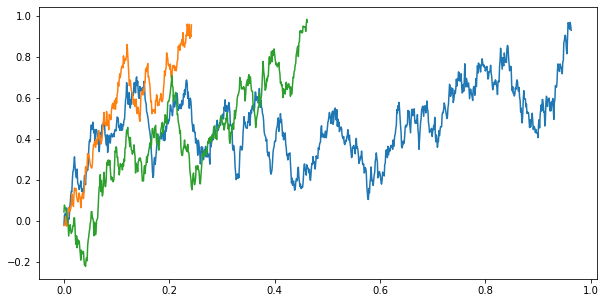

In [109]:
# Plot a trajectory
plt.figure(figsize=(10,5))
plt.plot(t, traj[0,:])
plt.plot(t, traj[1,:])
plt.plot(t, traj[3,:])
plt.show()

Manipulate evidence accumulation

In [114]:
# Optogentic manipulation on the integrator, here we clamp X

# Define DDM parameters
mu = 0.5 # drift
theta = 1 # bound
z = 0 # starting point
sigma = 1 # noise std
b = 0 # time varying bound

# Define simulation parameters
n_trials = 1000
dt = .001
T = 10

# Define optogenetic parameters
t = np.arange(0, T, dt) # simulation time
theta = theta*np.ones((t.size,1))
clamp_time = np.where(np.logical_and(t >= 0.2, t <= 0.7))[0] # 500 msec stimulation
clamp_val = 0*np.ones((clamp_time.size,1))
clamp_x = [clamp_time, clamp_val] # stimulation time, clamp value

# Run simulation
S, traj = ddm.sim_ddm(mu, theta, z, sigma, n_trials, dt, T, clamp_x)

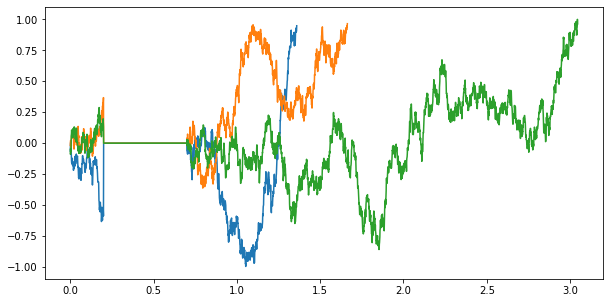

In [115]:
# Plot a trajectory
plt.figure(figsize=(10,5))
plt.plot(t, traj[0,:])
plt.plot(t, traj[1,:])
plt.plot(t, traj[3,:])
plt.show()

Manipulate decision

In [123]:
# Optogentic manipulation of the decision maker, here we change the decision bound theta

# Define DDM parameters
mu = 0.5 # drift
theta = 1 # bound
z = 0 # starting point
sigma = 1 # noise std
b = 0 # time varying bound

# Define simulation parameters
n_trials = 1000
dt = .001
T = 10

# Define optogenetic parameters
t = np.arange(0, T, dt) # simulation time
theta = theta*np.ones((t.size,1))
clamp_time = np.where(np.logical_and(t >= 0, t <= 9.0))[0] # 500 msec stimulation
clamp_val = np.nan*np.ones((clamp_time.size,1))
theta[clamp_time] = clamp_val # stimulation time, clamp value

# Run simulation
S, traj = ddm.sim_ddm(mu, theta, z, sigma, n_trials, dt, T)

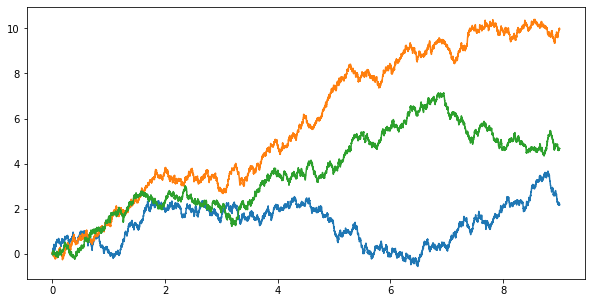

In [124]:
# Plot a trajectory
plt.figure(figsize=(10,5))
plt.plot(t, traj[0,:])
plt.plot(t, traj[1,:])
plt.plot(t, traj[3,:])
plt.show()